# Import

In [1]:
# Importing/Installing required Packages
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%pip install gensim
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Part 1

In [57]:
# Read the CSV file and separate by "^"
df = pd.read_csv("Amazon_Comments.csv", sep="^", header=None)
# Assign column names as mentioned in the Instructions
df.columns = ["ProductID", "ReviewID", "ReviewTitle", "ReviewTime", "Verified", "ReviewContent", "ReviewRating"]
# Display few rows
df


,ProductID,ReviewID,ReviewTitle,ReviewTime,Verified,ReviewContent,ReviewRating
0,1,1,These are hands down the best quality bands fo...,2016-01-16,False,These are hands down the best quality bands f...,5.0
1,1,2,High Quality Bands,2016-01-22,False,I just got this set yesterday as well as a se...,5.0
2,1,3,Five Stars,2015-12-27,False,My husband uses these and finds them to be go...,5.0
3,1,4,The resistance is great. I would agree that th...,2016-01-13,False,I got these for Christmas and have been using...,4.0
4,1,5,Good quality product,2016-01-20,False,Haven\t had it long enough to use all of the ...,5.0
...,...,...,...,...,...,...,...
2033,88,2034,Five Stars,2016-01-23,False,Just l like Nonna\s!,5.0
2034,88,2035,Five Stars,2016-01-22,False,Works great!,5.0
2035,88,2036,Five Stars,2016-01-18,False,very good,5.0
2036,88,2037,Five Stars,2016-01-20,False,great,5.0


In [58]:
# Download the stopwords list and initialize the stemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
# I will use a SnowballStemmer because it is the better version of PorterStemmer
stemmer = SnowballStemmer("english")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
# I will create a preprocess function that will lower the text, remove punctutations and stem the text from the "ReviewContent" column
def preprocess_review(text):
    words = text.lower()
    words = words.translate(str.maketrans('', '', string.punctuation)).split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)
# Create a new column for ProcessedReview
df['ProcessedReview'] = df['ReviewContent'].apply(preprocess_review)
# Display the result
df

,ProductID,ReviewID,ReviewTitle,ReviewTime,Verified,ReviewContent,ReviewRating,ProcessedReview
0,1,1,These are hands down the best quality bands fo...,2016-01-16,False,These are hands down the best quality bands f...,5.0,hand best qualiti band money 38 year old male ...
1,1,2,High Quality Bands,2016-01-22,False,I just got this set yesterday as well as a se...,5.0,got set yesterday well set anoth compani could...
2,1,3,Five Stars,2015-12-27,False,My husband uses these and finds them to be go...,5.0,husband use find good arthriti stretch exercis
3,1,4,The resistance is great. I would agree that th...,2016-01-13,False,I got these for Christmas and have been using...,4.0,got christma use multipl day week sinc resist ...
4,1,5,Good quality product,2016-01-20,False,Haven\t had it long enough to use all of the ...,5.0,havent long enough use compon far im impress q...
...,...,...,...,...,...,...,...,...
2033,88,2034,Five Stars,2016-01-23,False,Just l like Nonna\s!,5.0,l like nonna
2034,88,2035,Five Stars,2016-01-22,False,Works great!,5.0,work great
2035,88,2036,Five Stars,2016-01-18,False,very good,5.0,good
2036,88,2037,Five Stars,2016-01-20,False,great,5.0,great


In [60]:
# I will create a TF-IDF vectors for each document (star rating category)
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ProcessedReview'])


In [62]:
# I will create a dictionary to map star ratings to their respective TF-IDF matrices
ratings_to_tfidf = {}
for rating in df['ReviewRating'].unique():
    ratings_to_tfidf[rating] = tfidf_matrix[df['ReviewRating'] == rating]


In [63]:
# Looking at the review similarity
for rating, tfidf_matrix_for_rating in ratings_to_tfidf.items():
    print(f"TF-IDF matrix for {rating}-star reviews:")
    print(tfidf_matrix_for_rating)
    print()

TF-IDF matrix for 5.0-star reviews:
  (0, 2929)	0.1298050730527048
  (0, 757)	0.1406887489341138
  (0, 1411)	0.1406887489341138
  (0, 2605)	0.05731255742273129
  (0, 1560)	0.04454662175909841
  (0, 2604)	0.11498260828036387
  (0, 3382)	0.10024677384710569
  (0, 1959)	0.09690454773974923
  (0, 1363)	0.12491738968011448
  (0, 2760)	0.08901886811274959
  (0, 2916)	0.09277055100607921
  (0, 2349)	0.09495807670103307
  (0, 1981)	0.0628408174683913
  (0, 2694)	0.07406039943674522
  (0, 3755)	0.10504782688061326
  (0, 1510)	0.08291870567643503
  (0, 223)	0.16495182415950116
  (0, 3020)	0.09196008044662372
  (0, 1128)	0.06981569954847529
  (0, 2054)	0.06356456531411438
  (0, 334)	0.1093876295450275
  (0, 155)	0.12286828790736352
  (0, 737)	0.13634894626969957
  (0, 2203)	0.11632441469036876
  (0, 1225)	0.08707239707403343
  :	:
  (1514, 1560)	0.555458546985229
  (1514, 2054)	0.4681200567240496
  (1515, 1234)	0.7835424904402983
  (1515, 727)	0.4463019070058677
  (1515, 1560)	0.24809497005458472

In [64]:
# Creating a function to calculate cosine similarity and returns most similar reviews
# also i will limit the number of review in this function
def similar_reviews(target_rating, total_reviews=10):
    target_tfidf = ratings_to_tfidf[target_rating]
    cos_sim = cosine_similarity(target_tfidf, tfidf_matrix)
    # sorts the cosine similarity scores in descending order and returns the indices of the most similar reviews
    # i will also retrieve the top "total_reviews" similar reviews, excluding the target review itself
    top_similar = cos_sim.argsort()[0, ::-1][1:total_reviews + 1]
    return df.loc[top_similar]

# The code below will print the top 10 reviews most similar to the given 3-star review
similar_reviews(3,10)


,ProductID,ReviewID,ReviewTitle,ReviewTime,Verified,ReviewContent,ReviewRating,ProcessedReview
1272,48,1273,good buy,2016-01-18,False,good quality good price.,4.0,good qualiti good price
572,17,573,One Star,2016-01-04,False,So uncomfortable - and too big!,1.0,uncomfort big
492,14,493,Great Xmas Present,2016-01-20,False,Great Price! Present for My mother,5.0,great price present mother
53,1,54,great quality! 5 stars,2016-01-15,False,"Love this product, good quality and price",5.0,love product good qualiti price
59,1,60,Five Stars,2016-01-19,False,Good quality,5.0,good qualiti
1733,65,1734,Five Stars,2016-01-16,False,Good quality.,5.0,good qualiti
1866,79,1867,Five Stars,2016-01-16,False,Good quality,5.0,good qualiti
332,9,333,Four Stars,2016-01-10,False,good price,4.0,good price
1826,75,1827,Five Stars,2016-01-17,False,Good price.,5.0,good price
909,30,910,Four Stars,2016-01-19,False,good price,4.0,good price


In [65]:
# Finding most similar reviews to 1-star, 3-star, and 5-star reviews, and the count of reviews outputted will be 5
similar_1_star = similar_reviews(1, total_reviews=5)
similar_3_star = similar_reviews(3, total_reviews=5)
similar_5_star = similar_reviews(5, total_reviews=5)

In [66]:
# Printing the similar reviews
print("----------------------------------------------------------------------")
print("Most Similar Reviews To 1 Star Reviews:")
print(similar_1_star[['ReviewRating', 'ReviewContent', 'ProcessedReview']])
print("----------------------------------------------------------------------")
print("\nMost Similar Reviews To 3 Star Reviews:")
print(similar_3_star[['ReviewRating', 'ReviewContent', 'ProcessedReview']])
print("----------------------------------------------------------------------")
print("\nMost Similar Reviews To 5 Star Reviews:")
print(similar_5_star[['ReviewRating', 'ReviewContent', 'ProcessedReview']])
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
Most Similar Reviews To 1 Star Reviews:
      ReviewRating                                      ReviewContent  \
1364           5.0           After years... it\s still working great!   
1452           1.0   First one didn\t work, got a replacement and ...   
2001           5.0                               good quality, strong   
1608           4.0   I love it .. it has been more than one year ....   
599            4.0   This is the second time I\ve purchased this r...   

                                        ProcessedReview  
1364                              year still work great  
1452  first one didnt work got replac one also didnt...  
2001                                good qualiti strong  
1608                           love one year work great  
599   second time ive purchas replac head buy one ev...  
----------------------------------------------------------------------

Most Similar Reviews To 3 Star

# Part 2

In [67]:
# Importing the gzip file directly into pandas
df1 = pd.read_csv('winemag-data_first150k.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', index_col=0)
# Viewing the df1 table
df1

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [68]:
# I have already set stop_words and stemmer in part 1

# I will create a preprocess function that will lower the text, remove punctuations and stem the text from the "description" column
def preprocess_description(text):
    words = text.lower()
    words = words.translate(str.maketrans('', '', string.punctuation)).split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)
# Create a new column for ProcessedReview
df1['ProcessedDescription'] = df1['description'].apply(preprocess_description)
# Display the result
df1

,country,description,designation,points,price,province,region_1,region_2,variety,winery,ProcessedDescription
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremend 100 variet wine hail oakvill age three...
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aroma fig blackberri cassi soften sweeten...
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honor memori wine made mother treme...
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent 20 month 30 new french oak incorpor frui...
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude name highest point vineyard...
...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,mani peopl feel fiano repres southern itali pr...
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,offer intrigu nose ginger lime floral element ...
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,classic exampl come cru vineyard call terr di ...
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,perfect salmon shade scent peach cherri toast ...


In [69]:
# Tokenize words
df1['tokens'] = df1['ProcessedDescription'].apply(lambda x: word_tokenize(x))
df1

,country,description,designation,points,price,province,region_1,region_2,variety,winery,ProcessedDescription,tokens
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremend 100 variet wine hail oakvill age three...,"[tremend, 100, variet, wine, hail, oakvill, ag..."
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aroma fig blackberri cassi soften sweeten...,"[ripe, aroma, fig, blackberri, cassi, soften, ..."
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honor memori wine made mother treme...,"[mac, watson, honor, memori, wine, made, mothe..."
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent 20 month 30 new french oak incorpor frui...,"[spent, 20, month, 30, new, french, oak, incor..."
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude name highest point vineyard...,"[top, wine, la, bégude, name, highest, point, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,mani peopl feel fiano repres southern itali pr...,"[mani, peopl, feel, fiano, repres, southern, i..."
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,offer intrigu nose ginger lime floral element ...,"[offer, intrigu, nose, ginger, lime, floral, e..."
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,classic exampl come cru vineyard call terr di ...,"[classic, exampl, come, cru, vineyard, call, t..."
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,perfect salmon shade scent peach cherri toast ...,"[perfect, salmon, shade, scent, peach, cherri,..."


In [116]:
# Train a Word2Vec model
# i will use CBOW because since the words in descriptions seem similar, so accuracy will be slightly better then skip-gram
# Dimensionality will be at 50, windows at 10 and min_count at 1 (SEE 2 Cells below for detials)
model = Word2Vec(sentences=df1['tokens'], vector_size=50, window=10, min_count=1, sg=0)

In [117]:
# Example: Finding similar words to the word "grape" and also getting the average score
similar_check_word = "grape"
similar_words = model.wv.most_similar(similar_check_word, topn=5)

# Iterating through the list of similar words and summing their similarity scores
similarity_score = 0.0
for word, score in similar_words:
    similarity_score += score
# Finding the average similarity score
avg_similarity_score = similarity_score / len(similar_words)

# Printing the result
print(f'Average Similarity Score: {avg_similarity_score}')
print(f'Similarity Between Actual Word "{similar_check_word}" and Top 5 Words:\n{similar_words}"')

Average Similarity Score: 0.578010904788971
Similarity Between Actual Word "grape" and Top 5 Words:
[('varieti', 0.6621032357215881), ('farm', 0.5617000460624695), ('spanishinspir', 0.5603986382484436), ('organ', 0.5591881275177002), ('vine', 0.5466644763946533)]"


In [118]:
# Extracting the word vectors from the model
word_vectors = model.wv.vectors

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(word_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [138]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors)

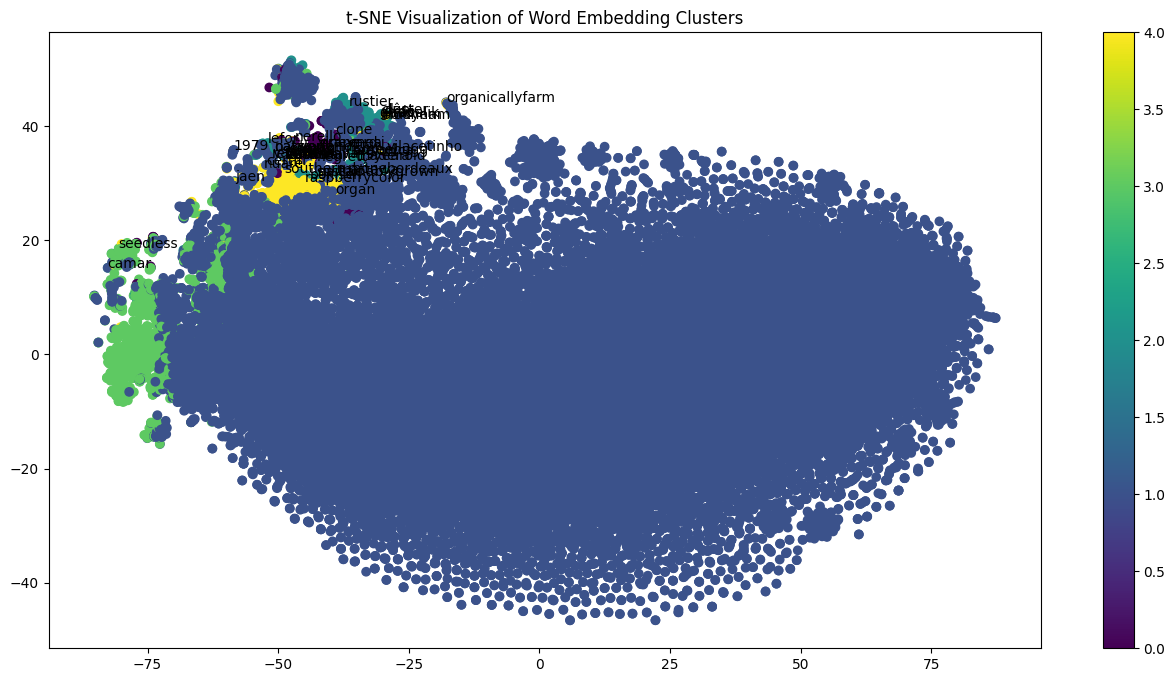

In [140]:
# Create a scatter plot to visualize clusters
plt.figure(figsize=(16, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Word Embedding Clusters")
#  similar words to the word 'grape' mentioned above
similar_words1 = model.wv.most_similar(similar_check_word, topn=50)
for i, label in enumerate(similar_words1[:50]):
    plt.annotate(label[0], (tsne_results[i, 0], tsne_results[i, 1]))
plt.show()

# Part 3

Why is an activation function needed for MLP?

---

There are many reasons but it all came down to one thing and that is an activation function is needed in a MLP to introduce Non-Linearity to the MLP, meaning that if there is no activation function MLP will be same as Linear Regression and it won't be able to learn complex non-linear relationships.

---

I am not sure about this point but i think it also might have something to do with XOR problem, using MLP doesn't automatically solve the XOR problem, one also has to use non-linear activation function like ReLU or Sigmoid with MLP to fix the XOR problem.
